# Requirements

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

## Customer Personality Analysis

## Read the dataset

In [4]:
df = pd.read_csv("marketing_campaign.csv")

# Dataset Description

## Attributes

### People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years

### Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

### Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target
The column Response is the prediction target.
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1932 non-null   float64
 1   Year_Birth           1925 non-null   float64
 2   Education            1921 non-null   object 
 3   Marital_Status       1924 non-null   object 
 4   Income               1855 non-null   float64
 5   Kidhome              1921 non-null   float64
 6   Teenhome             1950 non-null   float64
 7   Dt_Customer          1929 non-null   object 
 8   Recency              1930 non-null   float64
 9   MntWines             1907 non-null   float64
 10  MntFruits            1930 non-null   float64
 11  MntGoldProds         1921 non-null   float64
 12  NumDealsPurchases    1936 non-null   float64
 13  NumWebPurchases      1907 non-null   float64
 14  NumCatalogPurchases  1900 non-null   float64
 15  NumStorePurchases    1915 non-null   f

Load the dataset into a `pandas` data frame.

In [8]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,5524.0,1957.0,Graduation,Single,58138.0,NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,NaN,1954.0,NaN,Single,46344.0,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,4141.0,1965.0,Graduation,NaN,71613.0,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,6182.0,1984.0,Graduation,NaN,26646.0,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,5324.0,NaN,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1967.0,Graduation,Married,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,247.0,2.0,NaN,3.0,4.0,NaN,NaN,0.0,NaN
2236,4001.0,1946.0,PhD,Together,NaN,2.0,1.0,10/6/2014,56.0,406.0,0.0,NaN,7.0,NaN,2.0,5.0,7.0,1.0,0.0,0.0
2237,7270.0,1981.0,Graduation,Divorced,NaN,0.0,NaN,25-01-2014,91.0,908.0,48.0,24.0,1.0,2.0,3.0,13.0,NaN,0.0,NaN,0.0
2238,8235.0,1956.0,Master,NaN,69245.0,0.0,1.0,NaN,8.0,428.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


Explore the dataset using visualizations of your choice.

In [14]:
df = df.drop(columns=["ID"])

In [16]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
count,1925.000000,1855.000000,1921.000000,1950.000000,1930.000000,1907.000000,1930.000000,1921.000000,1936.000000,1907.000000,1900.000000,1915.000000,1927.000000,1944.000000,1922.000000,1900.000000
mean,1968.633766,52458.680863,0.447683,0.514359,48.723316,304.734137,26.407254,44.662676,2.322314,4.086523,2.698421,5.744125,5.328490,0.066358,0.013007,0.143684
std,11.854208,25810.595991,0.540540,0.548845,28.852840,333.906703,39.637588,53.079536,1.916186,2.811751,2.971711,3.253213,2.419318,0.248971,0.113335,0.350862
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35694.500000,0.000000,0.000000,24.000000,25.000000,2.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000
50%,1970.000000,51390.000000,0.000000,0.000000,49.000000,181.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000
75%,1977.000000,68656.000000,1.000000,1.000000,74.000000,505.000000,33.000000,57.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntGoldProds'}>],
       [<Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>],
       [<Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'AcceptedCmp1'}>,
        <Axes: title={'center': 'AcceptedCmp2'}>,
        <Axes: title={'center': 'Response'}>]], dtype=object)

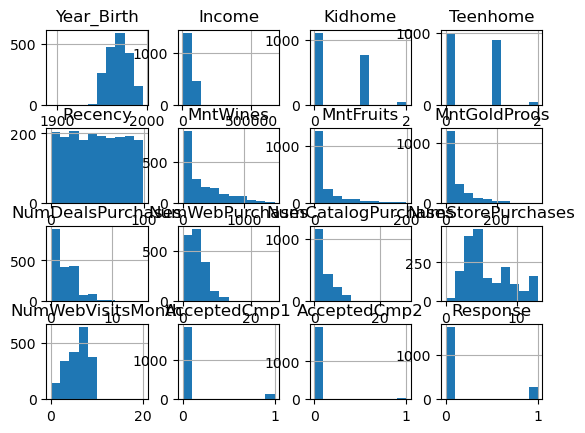

In [18]:
df.hist()

Check if the dataset is balanced.

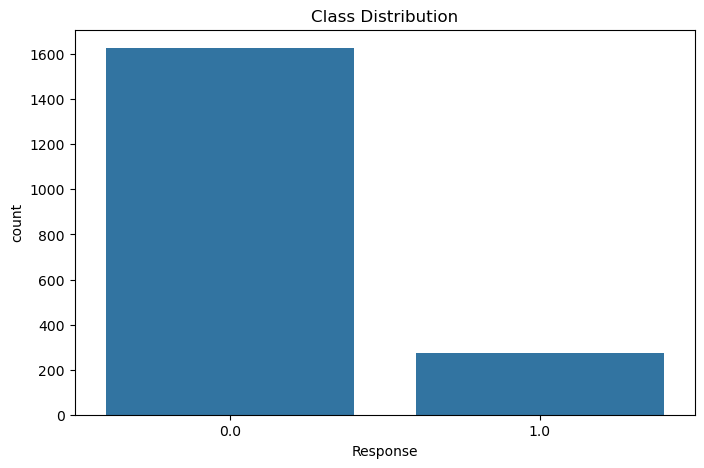

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Response', data=df)
plt.title('Class Distribution')
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [24]:
missing_percent = df.isnull().mean() * 100
missing_percent

Year_Birth             14.062500
Education              14.241071
Marital_Status         14.107143
Income                 17.187500
Kidhome                14.241071
Teenhome               12.946429
Dt_Customer            13.883929
Recency                13.839286
MntWines               14.866071
MntFruits              13.839286
MntGoldProds           14.241071
NumDealsPurchases      13.571429
NumWebPurchases        14.866071
NumCatalogPurchases    15.178571
NumStorePurchases      14.508929
NumWebVisitsMonth      13.973214
AcceptedCmp1           13.214286
AcceptedCmp2           14.196429
Response               15.178571
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

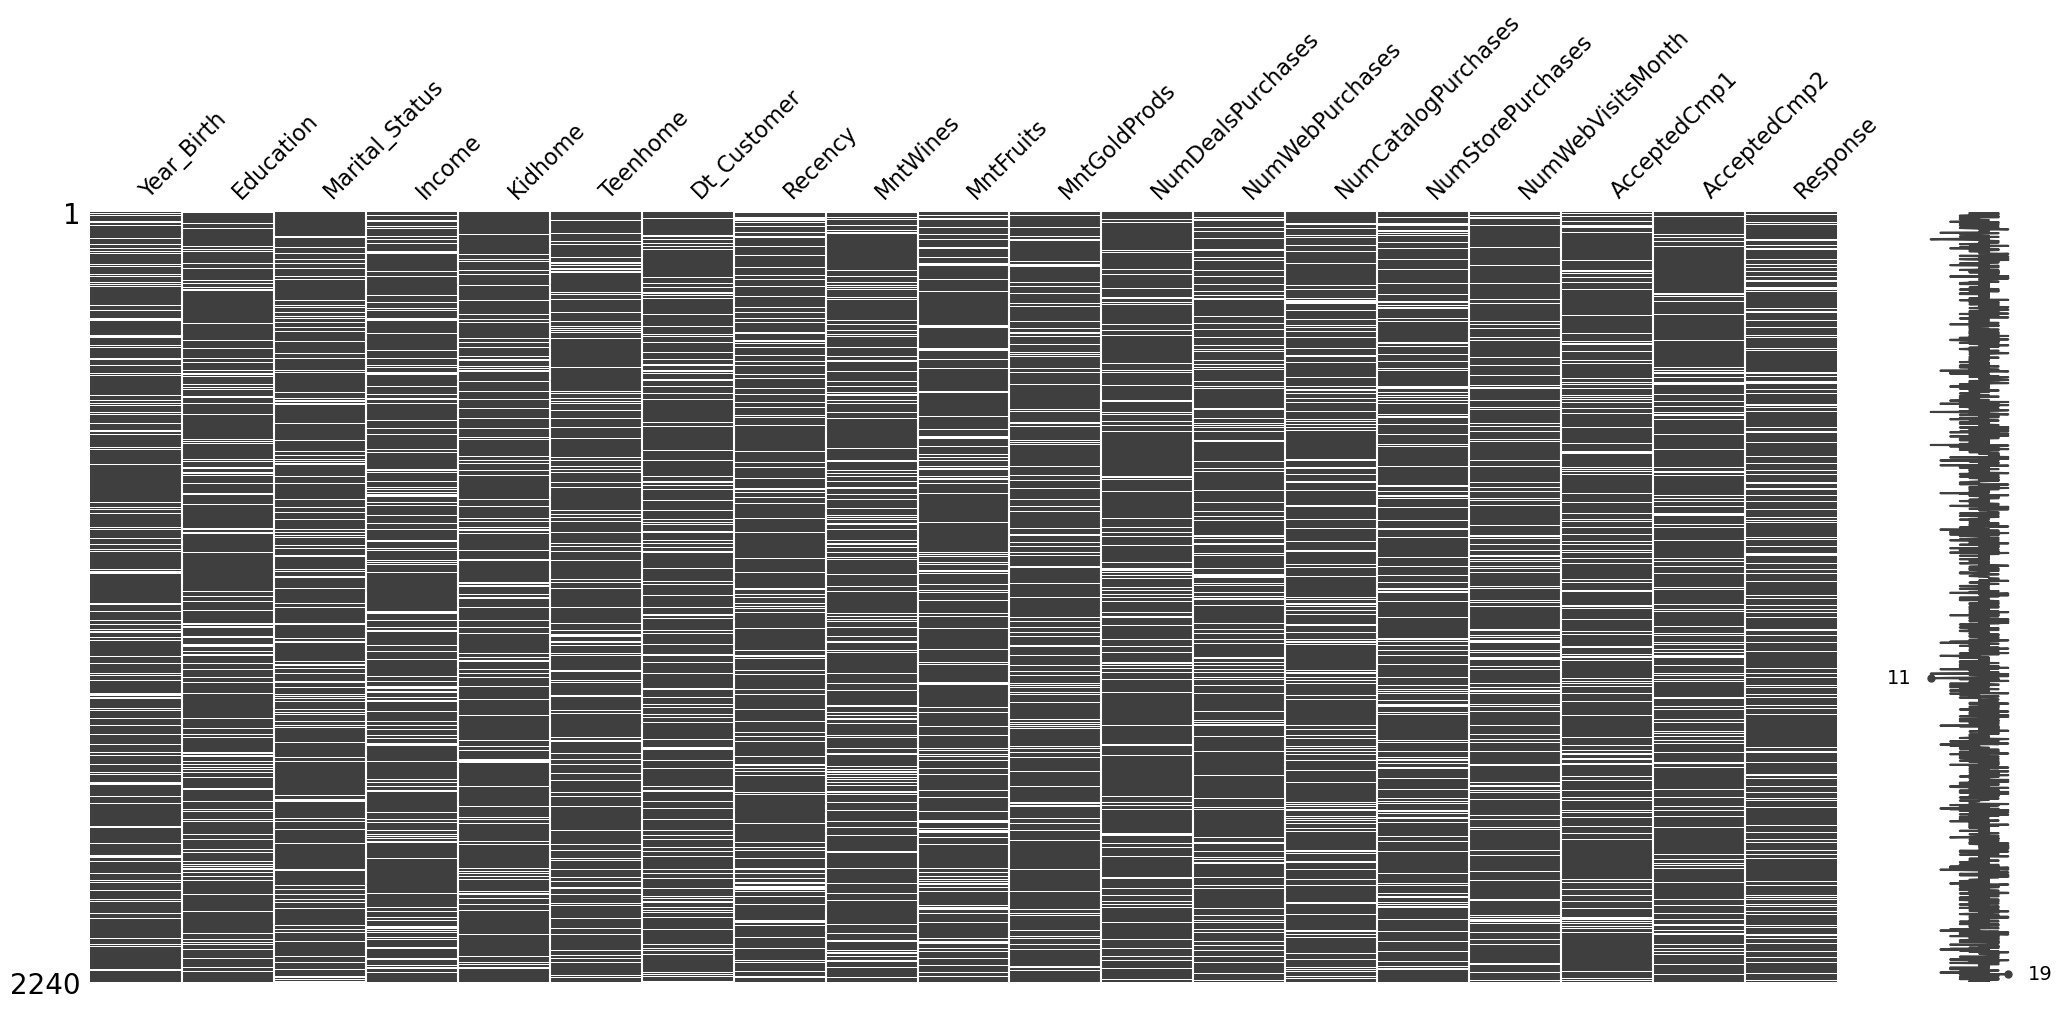

In [27]:
msno.matrix(df)

<Axes: >

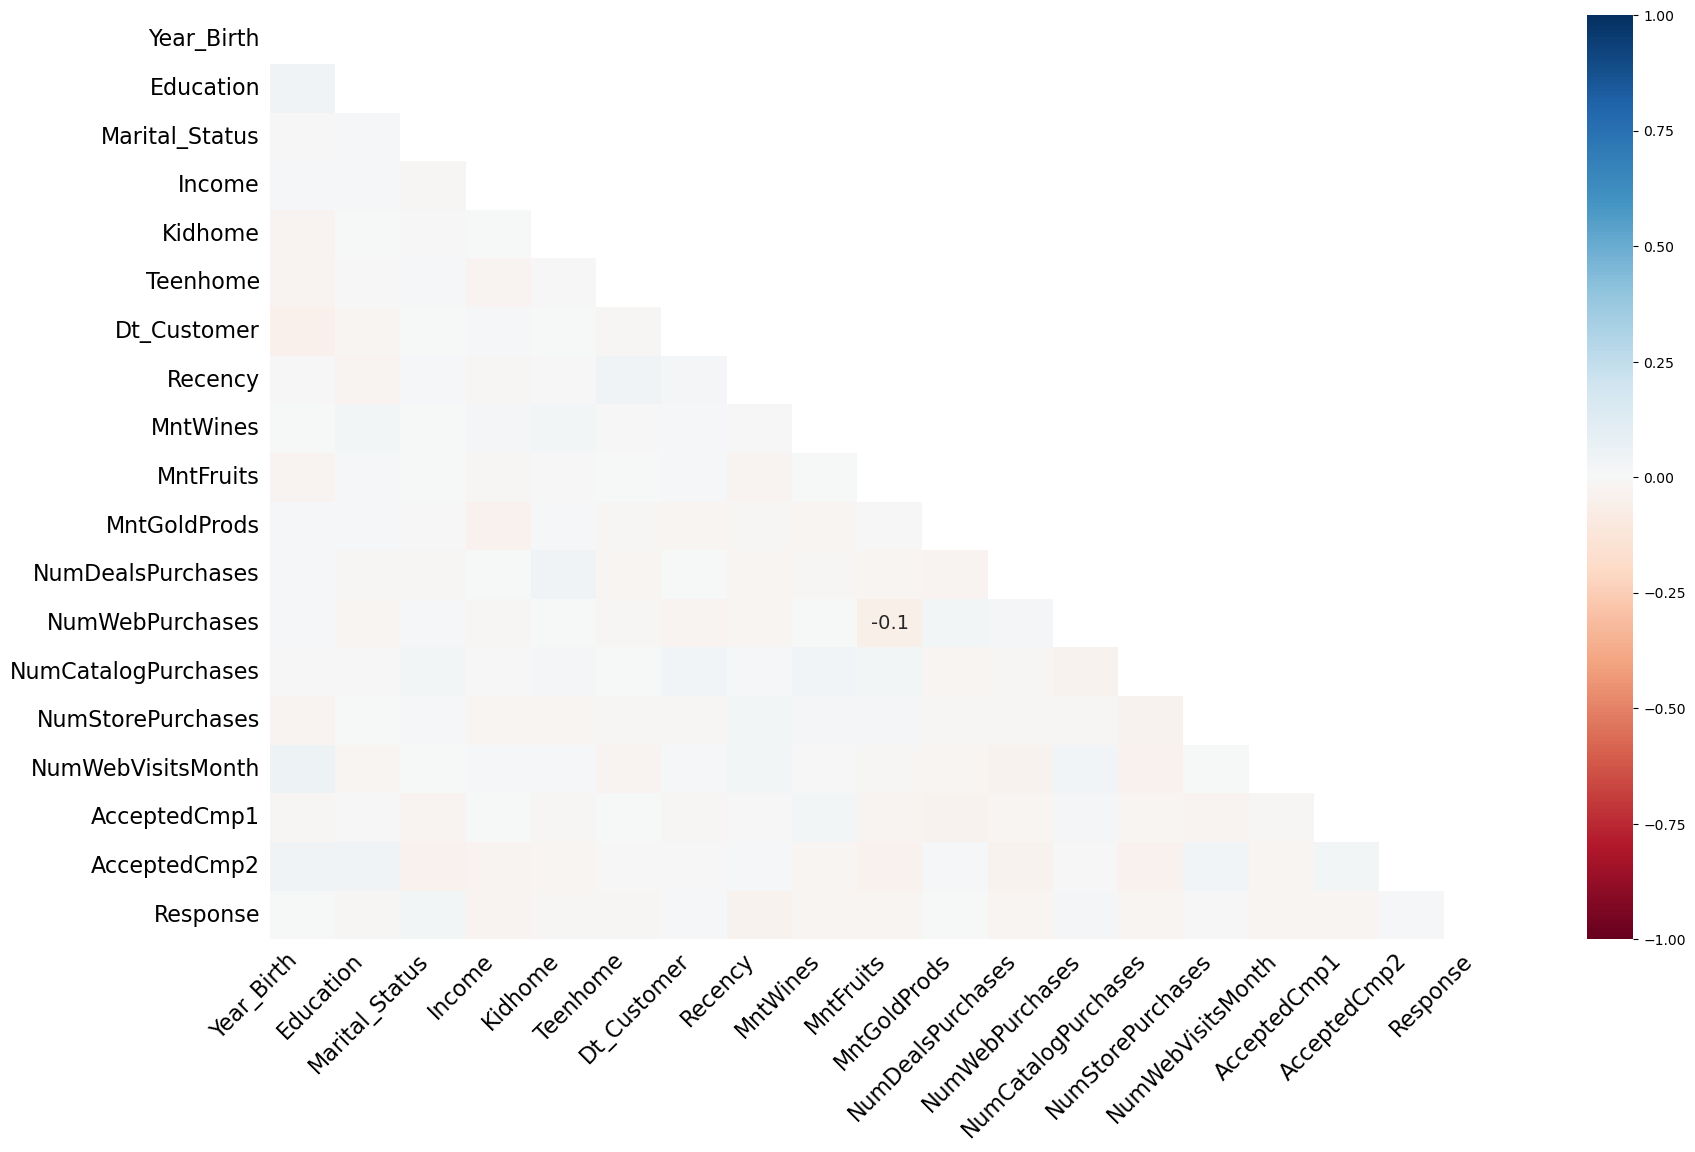

In [35]:
msno.heatmap(df)

<Axes: >

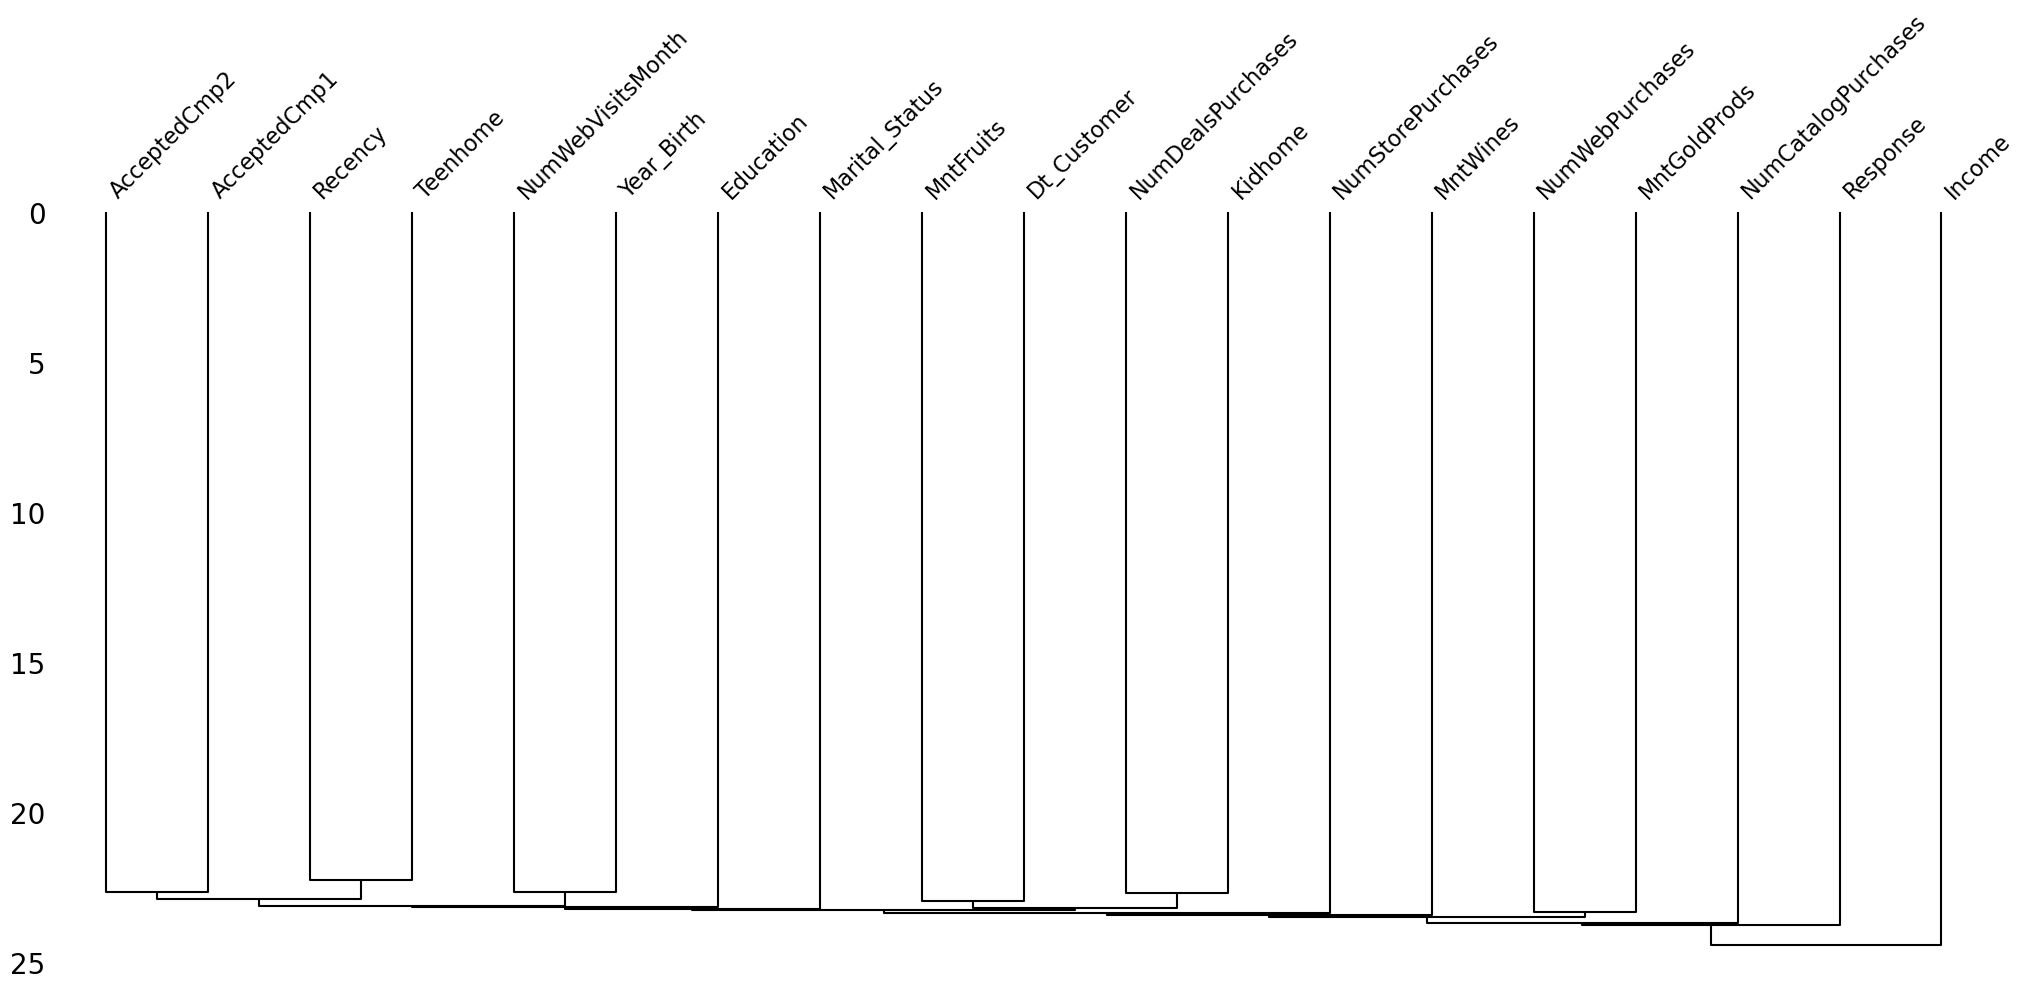

In [37]:
msno.dendrogram(df)

In [38]:
df[['MntWines', 'NumStorePurchases']].corr()

,MntWines,NumStorePurchases
MntWines,1.000000,0.644982
NumStorePurchases,0.644982,1.000000


In [40]:
df['Response'].unique()

array([ 1.,  0., nan])

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [45]:
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])
df['Education'] = df['Education'].fillna("Not educated")
df['Dt_Customer'] =  df['Dt_Customer'].fillna(df['Dt_Customer'].mode()[0])
df = df.dropna(subset=['Response'],axis=0)

In [47]:
# df.isnull().sum()
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,1957.0,Graduation,Single,58138.0,NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,1954.0,Not educated,Single,46344.0,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,1965.0,Graduation,Married,71613.0,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,1984.0,Graduation,Married,26646.0,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,NaN,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1974.0,Graduation,Married,34421.0,NaN,0.0,1/7/2013,81.0,NaN,3.0,9.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0
2236,1946.0,PhD,Together,NaN,2.0,1.0,10/6/2014,56.0,406.0,0.0,NaN,7.0,NaN,2.0,5.0,7.0,1.0,0.0,0.0
2237,1981.0,Graduation,Divorced,NaN,0.0,NaN,25-01-2014,91.0,908.0,48.0,24.0,1.0,2.0,3.0,13.0,NaN,0.0,NaN,0.0
2238,1956.0,Master,Married,69245.0,0.0,1.0,12/9/2012,8.0,428.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


In [49]:
df.fillna(df.select_dtypes(include='number').median(), inplace=True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,1957.0,Graduation,Single,58138.0,0.0,0.0,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,1954.0,Not educated,Single,46344.0,1.0,1.0,8/3/2014,49.0,174.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,1965.0,Graduation,Married,71613.0,0.0,0.0,21-08-2013,26.0,174.0,49.0,42.0,2.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,1984.0,Graduation,Married,26646.0,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,1970.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1974.0,Graduation,Married,34421.0,0.0,0.0,1/7/2013,81.0,174.0,3.0,9.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0
2236,1946.0,PhD,Together,51025.5,2.0,1.0,10/6/2014,56.0,406.0,0.0,24.0,7.0,3.0,2.0,5.0,7.0,1.0,0.0,0.0
2237,1981.0,Graduation,Divorced,51025.5,0.0,0.0,25-01-2014,91.0,908.0,48.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,0.0,0.0
2238,1956.0,Master,Married,69245.0,0.0,1.0,12/9/2012,8.0,428.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


In [51]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
dtype: int64

In [77]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

encoder = LabelEncoder()

df['Education'] = encoder.fit_transform(df['Education'])

df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])

df['Dt_Customer'] = encoder.fit_transform(df['Dt_Customer'])

encoder.classes_


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [55]:
# from sklearn.preprocessing import OneHotEncoder

# columns_to_encode = ['Education', 'Marital_Status', 'Dt_Customer']
# encoder = OneHotEncoder(sparse_output=False)
# encoded_columns = encoder.fit_transform(df[columns_to_encode])
# encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))
# df = pd.concat([df, encoded_df], axis=1).drop(columns=columns_to_encode) 
# df

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [58]:
from sklearn.impute import SimpleImputer, KNNImputer

In [60]:
from sklearn.model_selection import train_test_split

target = 'Response'
X = df.drop(target, axis=1)
Y = df[target]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

## Feature Preprocessing


Preprocess the features to make them ready for using the model

## K-Nearset Neighbors Classification

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
scaler = MinMaxScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [143]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance')
model.fit(X_train_normalized,Y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [153]:
y_pred = model.predict(X_test_normalized)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Use the trained model to make predictions for the test set.

In [156]:
y_pred = knn.predict(X_test)

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [159]:
from sklearn.metrics import f1_score,classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       334
         1.0       0.47      0.20      0.28        46

    accuracy                           0.88       380
   macro avg       0.69      0.58      0.60       380
weighted avg       0.85      0.88      0.85       380

